## Strock Market Using LSTM

In [1]:
import pandas_datareader as pdr

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [0]:
data= pdr.get_data_tiingo('AAPL', api_key='0d8894f5d38234cce4be3fd724fb71947d21842e')

In [0]:
data.to_csv('AAPL.csv')

In [0]:
import pandas as pd

In [5]:
data=pd.read_csv('AAPL.csv')
data.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
1,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
2,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0
3,AAPL,2015-06-03 00:00:00+00:00,130.120,130.940,129.90,130.66,30983542,119.908625,120.664274,119.705890,120.406248,30983542,0.0,1.0
4,AAPL,2015-06-04 00:00:00+00:00,129.360,130.580,128.91,129.58,38450118,119.208267,120.332526,118.793582,119.411002,38450118,0.0,1.0


In [6]:
data.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,AAPL,2020-05-19 00:00:00+00:00,313.14,318.52,313.01,315.03,25432385,313.14,318.52,313.01,315.03,25432385,0.0,1.0
1253,AAPL,2020-05-20 00:00:00+00:00,319.23,319.52,316.20,316.68,27876215,319.23,319.52,316.20,316.68,27876215,0.0,1.0
1254,AAPL,2020-05-21 00:00:00+00:00,316.85,320.89,315.87,318.66,25672211,316.85,320.89,315.87,318.66,25672211,0.0,1.0
1255,AAPL,2020-05-22 00:00:00+00:00,318.89,319.23,315.35,315.77,20450754,318.89,319.23,315.35,315.77,20450754,0.0,1.0
1256,AAPL,2020-05-26 00:00:00+00:00,316.73,324.24,316.50,323.50,31380454,316.73,324.24,316.50,323.50,31380454,0.0,1.0


In [0]:
data2=data.reset_index()['close']

In [8]:
data2[500:]

500     153.80
501     153.34
502     153.87
503     153.61
504     153.67
         ...  
1252    313.14
1253    319.23
1254    316.85
1255    318.89
1256    316.73
Name: close, Length: 757, dtype: float64

In [9]:
data2.shape

(1257,)

In [0]:
import matplotlib.pyplot as plt

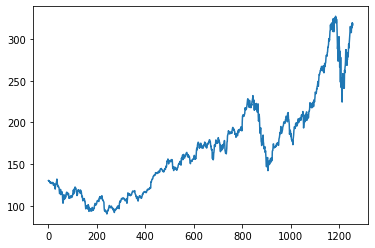

In [11]:
plt.plot(data2)

## Scaling the Close Column as a predictor

In [0]:
import numpy as np

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
scaler=MinMaxScaler(feature_range=(0,1))

In [0]:
data2=scaler.fit_transform(np.array(data2).reshape(-1,1))

In [16]:
data2

array([[0.16862282],
       [0.1696994 ],
       [0.16727181],
       ...,
       [0.9563033 ],
       [0.96491598],
       [0.95579667]])

## Splitting the dataset

In [0]:
training=int(len(data2)*0.75)

In [0]:
testing=len(data)-training

In [0]:
train,test=data2[0:training,:],data2[training:len(data2),:1]

In [20]:
train.shape,test.shape

((942, 1), (315, 1))

In [0]:
import numpy
def create_dataset(dataset,time_step=1):
    dataX,dataY=[],[]
    for i in range(len(dataset)-time_step-1):
        a= dataset[i:(i+time_step),0]       #i=0, 0,1,2,3
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return numpy.array(dataX), numpy.array(dataY)

In [0]:
#reshape menjadi X=t,t+1,t+2,t+4 dan Y=t+4
time_step=100
X_train,y_train=create_dataset(train,time_step)
X_test,y_test= create_dataset(test,time_step)

In [23]:
print(X_train)

[[0.16862282 0.1696994  0.16727181 ... 0.09085536 0.0873934  0.09030651]
 [0.1696994  0.16727181 0.16794731 ... 0.0873934  0.09030651 0.09891919]
 [0.16727181 0.16794731 0.16473866 ... 0.09030651 0.09891919 0.09887697]
 ...
 [0.55665794 0.54918517 0.56831039 ... 0.33969433 0.33809001 0.34024318]
 [0.54918517 0.56831039 0.5716457  ... 0.33809001 0.34024318 0.34488728]
 [0.56831039 0.5716457  0.57806299 ... 0.34024318 0.34488728 0.34079203]]


In [24]:
print(y_train)

[0.09891919 0.09887697 0.10622309 0.1213375  0.10529427 0.10221228
 0.12213966 0.12745926 0.1231107  0.1302035  0.13607194 0.13366546
 0.1291058  0.12969687 0.12762813 0.1115849  0.10879845 0.1071519
 0.09288187 0.10062906 0.09858144 0.11378029 0.12007093 0.12226632
 0.11572237 0.12049312 0.1169045  0.11597568 0.11804441 0.11399139
 0.10951617 0.10495651 0.1211264  0.11795998 0.11774888 0.10672971
 0.10905176 0.09642827 0.09347294 0.08507135 0.08865997 0.07869628
 0.06624166 0.07173014 0.07130795 0.07713417 0.07468547 0.06957697
 0.07768302 0.07168792 0.0629908  0.06337077 0.05222494 0.04373892
 0.02579583 0.027949   0.03457739 0.04061471 0.02976442 0.03875707
 0.02866672 0.02668243 0.02723128 0.02516254 0.04677869 0.03841932
 0.04074137 0.01300346 0.01583214 0.02955332 0.02571139 0.01747868
 0.02537364 0.02642911 0.0155366  0.01971629 0.01963185 0.01659208
 0.01418559 0.01540995 0.02659799 0.03284641 0.02499367 0.02406485
 0.02761125 0.01836528 0.02431816 0.02710462 0.0277379  0.02680

In [25]:
print(X_train.shape),print(y_train.shape),print(X_test.shape),print(y_test.shape)

(841, 100)
(841,)
(214, 100)
(214,)


(None, None, None, None)

In [26]:
#reshape input menjadi [sample, time_step, features] yang dibutuhkan untuk LSTM
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)
X_train

array([[[0.16862282],
        [0.1696994 ],
        [0.16727181],
        ...,
        [0.09085536],
        [0.0873934 ],
        [0.09030651]],

       [[0.1696994 ],
        [0.16727181],
        [0.16794731],
        ...,
        [0.0873934 ],
        [0.09030651],
        [0.09891919]],

       [[0.16727181],
        [0.16794731],
        [0.16473866],
        ...,
        [0.09030651],
        [0.09891919],
        [0.09887697]],

       ...,

       [[0.55665794],
        [0.54918517],
        [0.56831039],
        ...,
        [0.33969433],
        [0.33809001],
        [0.34024318]],

       [[0.54918517],
        [0.56831039],
        [0.5716457 ],
        ...,
        [0.33809001],
        [0.34024318],
        [0.34488728]],

       [[0.56831039],
        [0.5716457 ],
        [0.57806299],
        ...,
        [0.34024318],
        [0.34488728],
        [0.34079203]]])

In [0]:
# membuat LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [0]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.fit(X_train, y_train, validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
14/14 [==============================] - 3s 232ms/step - loss: 0.0191 - val_loss: 0.1052
Epoch 2/100
14/14 [==============================] - 2s 175ms/step - loss: 0.0044 - val_loss: 0.0146
Epoch 3/100
14/14 [==============================] - 2s 178ms/step - loss: 0.0016 - val_loss: 0.0057
Epoch 4/100
14/14 [==============================] - 2s 176ms/step - loss: 0.0016 - val_loss: 0.0060
Epoch 5/100
14/14 [==============================] - 3s 190ms/step - loss: 0.0011 - val_loss: 0.0048
Epoch 6/100
14/14 [==============================] - 3s 188ms/step - loss: 9.2628e-04 - val_loss: 0.0049
Epoch 7/100
14/14 [==============================] - 2s 176ms/step - loss: 9.3555e-04 - val_loss: 0.0057
Epoch 8/100
14/14 [==============================] - 2s 177ms/step - loss: 8.4744e-04 - val_loss: 0.0065
Epoch 9/100
14/14 [==============================] - 2s 177ms/step - loss: 8.0554e-04 - val_loss: 0.0065
Epoch 10/100
14/14 [==============================] - 2s 177ms/step - loss:

In [0]:
import tensorflow as tf

In [0]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [0]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [35]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

151.63109138538013

In [36]:
#Test data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

260.39216702983236

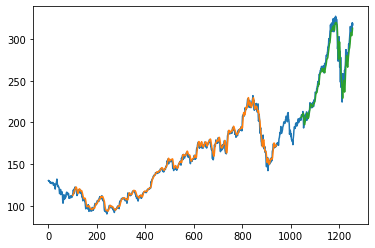

In [38]:
# Plotting 

#train prediction
look_back=100
trainplot=numpy.empty_like(data2)
trainplot[:,:]=np.nan
trainplot[look_back:len(train_predict)+look_back,:] =train_predict
#test prediction
testplot=numpy.empty_like(data2)
testplot[:,:]=np.nan
testplot[len(train_predict)+(look_back*2)+1:len(data2)-1,:] =test_predict

#Plot baseline
plt.plot(scaler.inverse_transform(data2))
plt.plot(trainplot)
plt.plot(testplot)
plt.show()

In [39]:
len(test)

315

In [40]:
x_input=test[215:].reshape(1,-1)
x_input.shape

(1, 100)

In [0]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [42]:
temp_input

[0.8866418981676942,
 0.8743139407244789,
 0.8843198513890065,
 0.8783669678290975,
 0.8986321033521913,
 0.925821160179009,
 0.9287764924427933,
 0.9567677108840666,
 0.9386979650426415,
 0.933040614709111,
 0.9495060373216249,
 0.9642404796082076,
 0.9551211686228154,
 0.9598919192772104,
 0.9663514312251966,
 0.9624672802499368,
 0.9229502659799038,
 0.9598497002448705,
 0.9879253567508233,
 0.985941062230854,
 0.9253145317909315,
 0.9217259140420504,
 0.964747107996285,
 0.9757240564046274,
 0.9915984125643842,
 0.9697289538123788,
 0.9761462467280253,
 0.9679557544541082,
 1.0000000000000002,
 0.9901629654648318,
 0.9905007177235499,
 0.9653803934813816,
 0.9848855864223593,
 0.9708688676855528,
 0.9402600692392133,
 0.8774803681499621,
 0.8348391454867856,
 0.8541332432660644,
 0.7733682344000676,
 0.7726927298826314,
 0.8801401671873683,
 0.8400743054969182,
 0.8967322468969012,
 0.8552731571392387,
 0.8388499535590646,
 0.7423372456303303,
 0.8232711306256861,
 0.78143206957696

In [43]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.9488866]
101
1 day input [0.87431394 0.88431985 0.87836697 0.8986321  0.92582116 0.92877649
 0.95676771 0.93869797 0.93304061 0.94950604 0.96424048 0.95512117
 0.95989192 0.96635143 0.96246728 0.92295027 0.9598497  0.98792536
 0.98594106 0.92531453 0.92172591 0.96474711 0.97572406 0.99159841
 0.96972895 0.97614625 0.96795575 1.         0.99016297 0.99050072
 0.96538039 0.98488559 0.97086887 0.94026007 0.87748037 0.83483915
 0.85413324 0.77336823 0.77269273 0.88014017 0.84007431 0.89673225
 0.85527316 0.83884995 0.74233725 0.82327113 0.78143207 0.6665963
 0.7921557  0.64118044 0.68614371 0.66001013 0.65203074 0.58642236
 0.56586169 0.66089673 0.65515494 0.70970193 0.66452757 0.69437642
 0.69218104 0.63569197 0.65266402 0.63780292 0.7267162  0.71388162
 0.74191506 0.75002111 0.77222832 0.83049059 0.8194292  0.8289707
 0.8125475  0.78776492 0.75162543 0.78426074 0.77974331 0.81326522
 0.8141096  0.79473106 0.83336148 0.85898843 0.83901883 0.85628641
 0.87486279 0.88782403 0.90095415 0.

In [0]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [47]:
len(data2)

1257

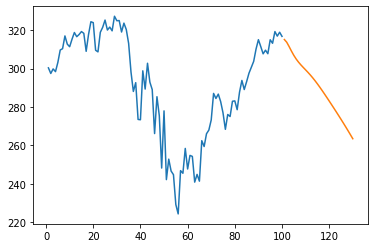

In [48]:
plt.plot(day_new,scaler.inverse_transform(data2[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

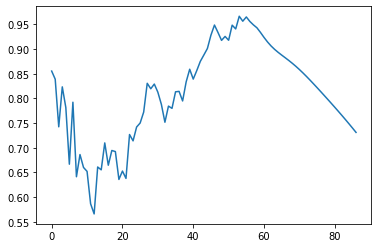

In [50]:
data3=data2.tolist()
data3.extend(lst_output)
plt.plot(data3[1200:])

In [0]:
data3=scaler.inverse_transform(data3).tolist()

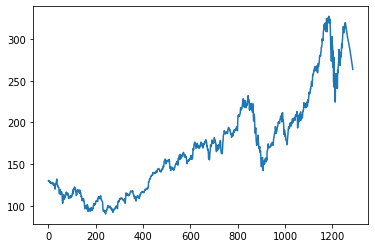

In [53]:
plt.plot(data3)